## Cluster Analysis -  Health App Form Data

#### Let's explore the data first.

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/swanandmarathe/Desktop/health_app_project_Datasets/health_app_data - app_form.csv')

In [3]:
df.head()

,user_id,age,weight,height,workout_in_week,meditation_in_week,diabetic,blood_pressure,vitamins,active_disease,care_wellbeing
0,2824,35,65,164,2,1,No,No,Yes,Other,Care
1,9928,25,87,167,0,2,No,No,Yes,None,Well-being
2,6635,42,96,179,1,6,Yes,No,No,None,Well-being
3,5741,47,68,155,3,1,No,No,No,Respiratory Problem,Care
4,4598,35,84,196,3,2,No,No,No,None,Well-being


In [4]:
df.shape

(3650, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             3650 non-null   int64 
 1   age                 3650 non-null   int64 
 2   weight              3650 non-null   int64 
 3   height              3650 non-null   int64 
 4   workout_in_week     3650 non-null   int64 
 5   meditation_in_week  3650 non-null   int64 
 6   diabetic            3650 non-null   object
 7   blood_pressure      3650 non-null   object
 8   vitamins            3650 non-null   object
 9   active_disease      3650 non-null   object
 10  care_wellbeing      3650 non-null   object
dtypes: int64(6), object(5)
memory usage: 313.8+ KB


#### Lets drop 'user_id' and divide variables into categorical and continuous.

In [6]:
df.drop('user_id', axis=1, inplace=True)

In [7]:
categorical_vars = [
    'workout_in_week', 'meditation_in_week',
    'diabetic', 'blood_pressure', 'vitamins', 'active_disease',
    'care_wellbeing'
]
continuous_vars = ['age', 'height', 'weight']

#### We need to standardize the data to perform clustering. hence we will create dummies for categorical variables and will scale the countinuous data. 

In [8]:
df_dummy = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_dummy[continuous_vars] = scaler.fit_transform(df[continuous_vars])

In [10]:
df_dummy.head()

,age,weight,height,workout_in_week_1,workout_in_week_2,workout_in_week_3,workout_in_week_4,workout_in_week_5,workout_in_week_6,workout_in_week_7,...,diabetic_Yes,blood_pressure_Yes,vitamins_Yes,active_disease_Cancer,active_disease_Heart Problem,active_disease_None,active_disease_Other,active_disease_Respiratory Problem,active_disease_Tuberculosis,care_wellbeing_Well-being
0,0.098707,-0.698557,-0.773342,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,-1.335532,0.804702,-0.569782,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,1.102675,1.419672,0.244458,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,1.819794,-0.493567,-1.384022,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.098707,0.599712,1.397965,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


#### First, we need to perform 'Elbow Method' to obtain number of clusters that can be achived.

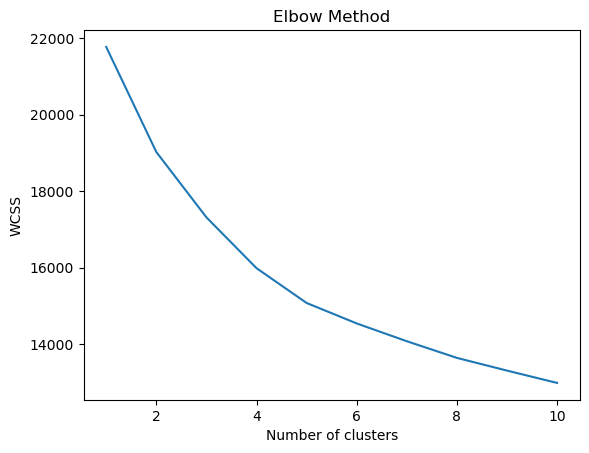

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_dummy)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### In above chart, we can see the graph starts levelling off after 2. Hence, we will go with two clusters.

In [15]:
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df_dummy['Cluster'] = kmeans.fit_predict(df_dummy)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

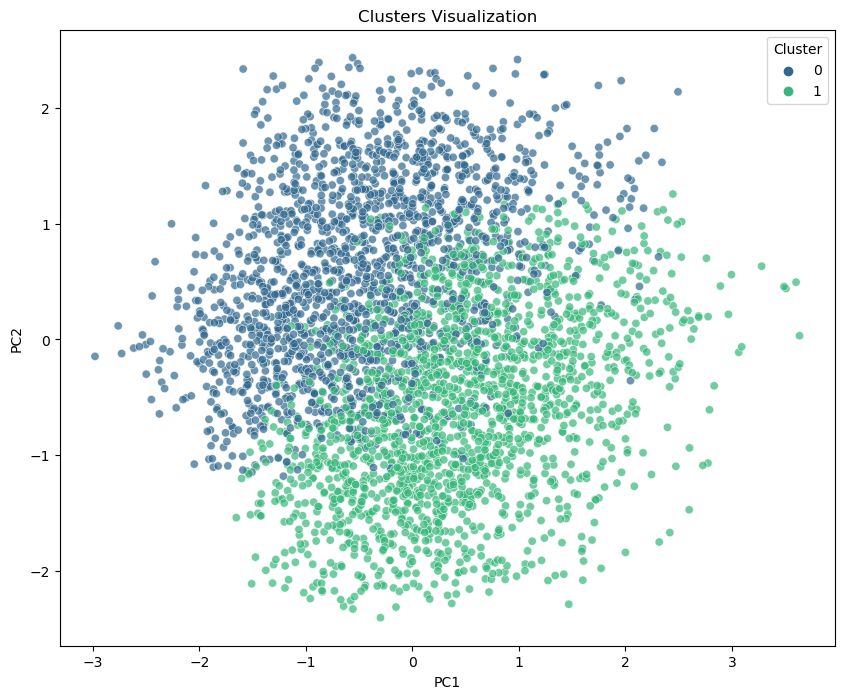

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_dummy.drop('Cluster', axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = df_dummy['Cluster']

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='viridis', alpha=0.7)
plt.title('Clusters Visualization')
plt.show()

In [23]:
df['cluster'] = df_dummy['Cluster']

In [24]:
df.head()

,age,weight,height,workout_in_week,meditation_in_week,diabetic,blood_pressure,vitamins,active_disease,care_wellbeing,cluster
0,35,65,164,2,1,No,No,Yes,Other,Care,0
1,25,87,167,0,2,No,No,Yes,None,Well-being,0
2,42,96,179,1,6,Yes,No,No,None,Well-being,1
3,47,68,155,3,1,No,No,No,Respiratory Problem,Care,0
4,35,84,196,3,2,No,No,No,None,Well-being,1


In [26]:
# Calculate mean or median for continuous variables
cluster_means = df.groupby('cluster')[continuous_vars].mean()
print(cluster_means)

# Calculate mode for categorical variables
for var in categorical_vars:
    mode_df = df.groupby('cluster')[var].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    print(f"Mode for {var} by cluster:\n{mode_df}\n")

               age      height     weight
cluster                                  
0        33.878021  162.324340  74.947161
1        34.724212  187.827365  75.485836
Mode for workout_in_week by cluster:
cluster
0    6
1    2
Name: workout_in_week, dtype: int64

Mode for meditation_in_week by cluster:
cluster
0    0
1    1
Name: meditation_in_week, dtype: int64

Mode for diabetic by cluster:
cluster
0    No
1    No
Name: diabetic, dtype: object

Mode for blood_pressure by cluster:
cluster
0    No
1    No
Name: blood_pressure, dtype: object

Mode for vitamins by cluster:
cluster
0    Yes
1    Yes
Name: vitamins, dtype: object

Mode for active_disease by cluster:
cluster
0    None
1    None
Name: active_disease, dtype: object

Mode for care_wellbeing by cluster:
cluster
0    Well-being
1    Well-being
Name: care_wellbeing, dtype: object



#### Looking at the mean and mode of variable we can colclude we have two user clusters. 
#### 1. Users who workout frequetely 
#### 2. User who workout sometimes.